In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [106]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss('data/PLdata_bh_34.mat')
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss('data/PLdata_bh_53.mat')
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss('data/PLdata_bh_64.mat')

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss('data/PLdata_ma_34.mat')
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss('data/PLdata_ma_53.mat')
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss('data/PLdata_ma_64.mat')

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


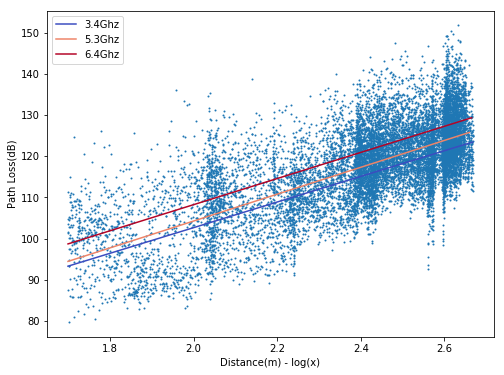

RMSE(dB),train error,test error
3.4Ghz,7.05391,7.08650
5.3Ghz,7.14005,7.00079
6.4Ghz,7.53110,7.71988


In [4]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


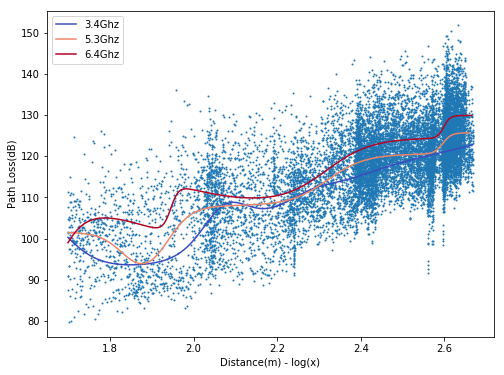

RMSE(dB),train error,test error
3.4Ghz,6.89188,6.97656
5.3Ghz,6.85470,6.94937
6.4Ghz,7.38049,7.57958


In [4]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


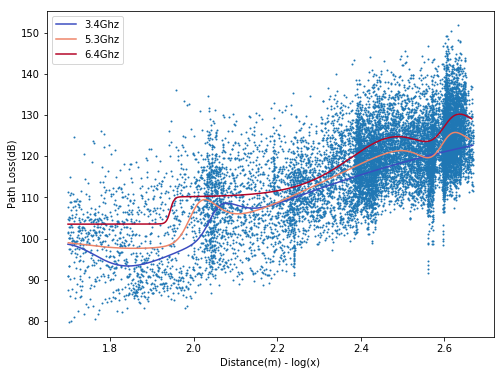

RMSE(dB),train error,test error
3.4Ghz,6.89137,6.96462
5.3Ghz,6.83990,6.93006
6.4Ghz,7.38312,7.53467


In [5]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


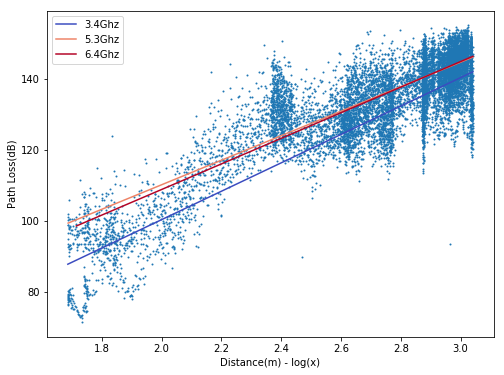

RMSE(dB),train error,test error
3.4Ghz,7.74425,7.54112
5.3Ghz,6.47094,6.91313
6.4Ghz,6.88171,7.13402


In [9]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


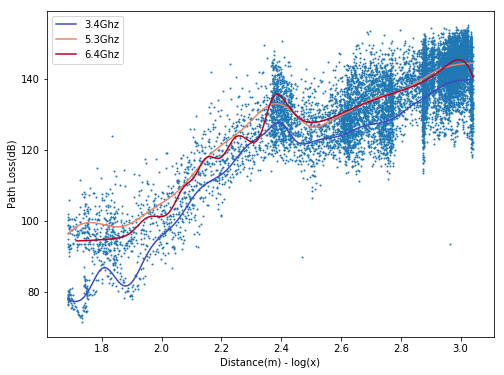

RMSE(dB),train error,test error
3.4Ghz,6.38105,6.40432
5.3Ghz,5.74218,6.07229
6.4Ghz,5.64487,5.42628


In [7]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


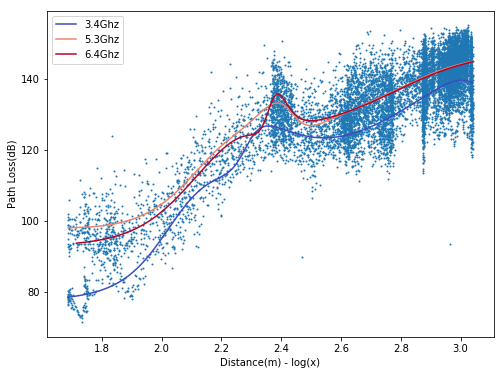

RMSE(dB),train error,test error
3.4Ghz,6.44193,6.37272
5.3Ghz,5.76999,6.08749
6.4Ghz,5.78709,5.54691


In [8]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

# Multi-dimensional regression (Features: log distance, frequency)

In [4]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',3400)
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',5300)
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',6400)

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',3400)
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',5300)
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',6400)

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

dataX_bh = list()
dataX_ma = []
dataX_bh.append(X_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataX_bh.append(X_train_bh_64)

dataX_ma.append(X_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataX_ma.append(X_train_ma_64)

26.50587751627807
564
3
1
<Bundang>


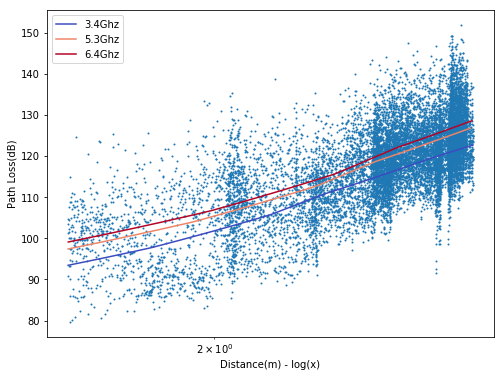

RMSE(dB),train error,test error
3.4Ghz,7.05262,6.91262
5.3Ghz,7.16293,7.24006
6.4Ghz,7.62401,7.38588
Overall,7.28092,7.18203


In [35]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60), 'relu', 'lbfgs')
print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
print("<Bundang>")
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>
28.030736484333257
3001
3
1


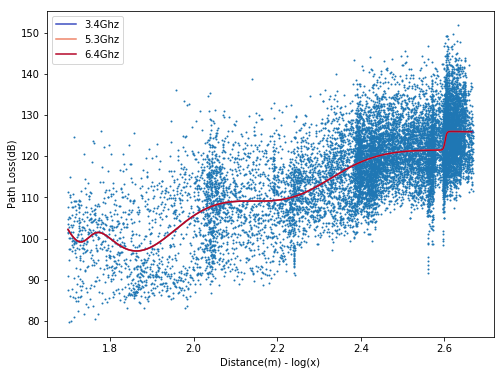

RMSE(dB),train error,test error
3.4Ghz,7.46385,7.67052
5.3Ghz,6.90683,6.88934
6.4Ghz,8.06819,7.81079
Overall,7.48488,7.45923


In [94]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (500,), 'logistic', 'lbfgs')

print("<Bundang>")
print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>
22.946505843370826
3001
3
1


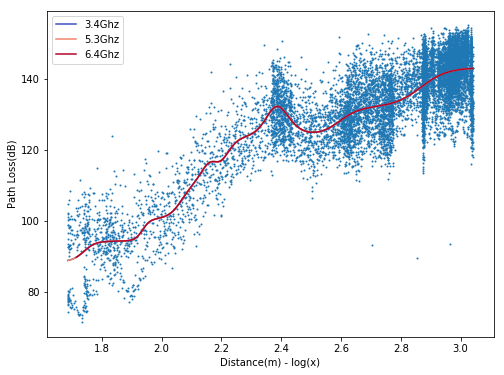

RMSE(dB),train error,test error
3.4Ghz,7.91797,7.36780
5.3Ghz,6.33072,6.35616
6.4Ghz,6.00772,6.01179
Overall,6.77430,6.58455


In [95]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'logistic', 'lbfgs')
print("<Mokdong>")
print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
mlp_train_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


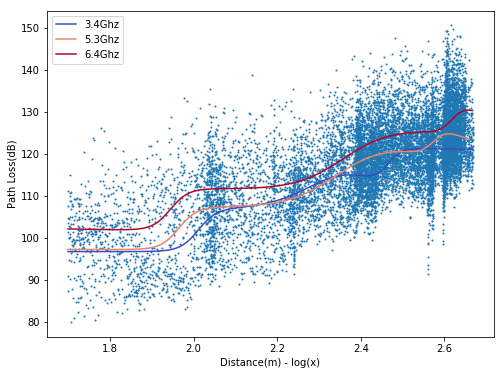

RMSE(dB),train error,test error
3.4Ghz,6.95308,7.28598
5.3Ghz,6.99388,6.90846
6.4Ghz,7.40057,7.39128
Overall,7.11582,7.19372


In [203]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60), 'tanh', 'lbfgs')

print("<Bundang>")
print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


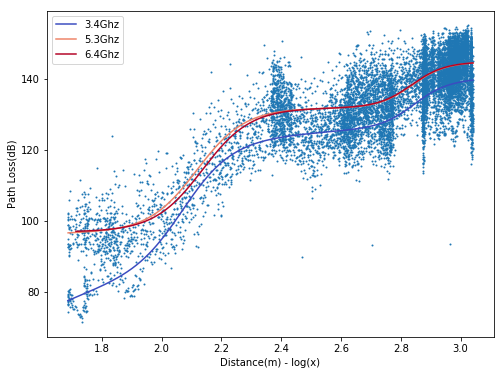

RMSE(dB),train error,test error
3.4Ghz,6.56357,6.74807
5.3Ghz,5.93081,5.72333
6.4Ghz,5.99406,5.76026
Overall,6.15858,6.07764


In [205]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60), 'tanh', 'lbfgs')
print("<Mokdong>")
print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
mlp_train_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

In [7]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

print(X_train_bh)
print(np.power(10,X_train_bh))
print(X_train_ma)

[[1.69917874 3.53147892]
 [1.69921533 3.72427587]
 [1.699326   3.80617997]
 ...
 [2.66794029 3.53147892]
 [2.66798139 3.53147892]
 [2.6680225  3.53147892]]
[[  50.02403717 3400.        ]
 [  50.02825198 5300.        ]
 [  50.0410019  6400.        ]
 ...
 [ 465.52208123 3400.        ]
 [ 465.56614842 3400.        ]
 [ 465.6102156  3400.        ]]
[[1.68609629 3.53147892]
 [1.68623095 3.53147892]
 [1.68648208 3.53147892]
 ...
 [3.04134239 3.72427587]
 [3.04136197 3.53147892]
 [3.04138145 3.53147892]]


# 3D graph (distance, frequency, pathloss)

In [3]:
%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

<Bundang>


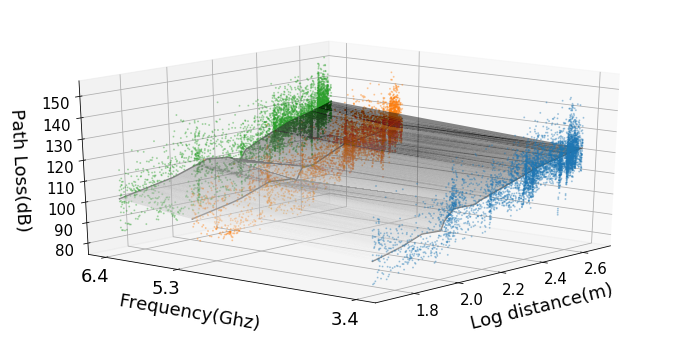

25.451041663344046
2001
7
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.92481,6.98273,7.32941
5.3Ghz,6.99091,7.15038,7.10638
6.4Ghz,7.48531,7.76101,7.19070
Overall,7.13457,7.30167,7.20820


In [53]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60, 60, 60, 60, 60,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Bundang>


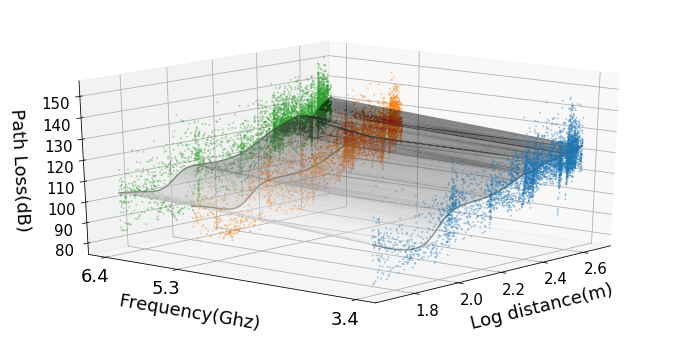

24.987429303346744
2001
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.86268,6.94384,7.30540
5.3Ghz,6.92409,7.06802,7.06703
6.4Ghz,7.41848,7.61959,7.24538
Overall,7.06929,7.21277,7.20472


In [47]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'logistic', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Bundang>


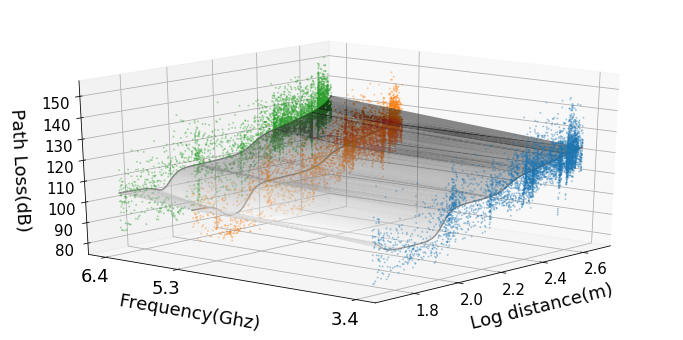

25.164697406827557
2001
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.87329,6.97737,7.27248
5.3Ghz,6.92494,7.11156,7.02997
6.4Ghz,7.48069,7.70795,7.24747
Overall,7.09432,7.26857,7.18190


In [49]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'tanh', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


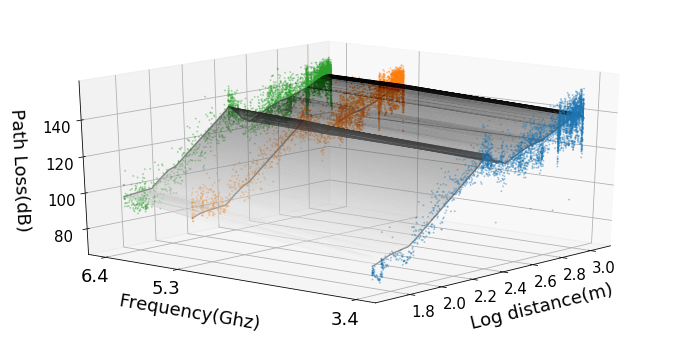

18.357916104590753
2001
7
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.56062,6.18718,6.68157
5.3Ghz,5.91302,6.23562,5.81025
6.4Ghz,5.70748,6.11640,6.14897
Overall,6.05936,6.18047,6.20972


In [50]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60, 60, 60, 60, 60,), 'relu', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


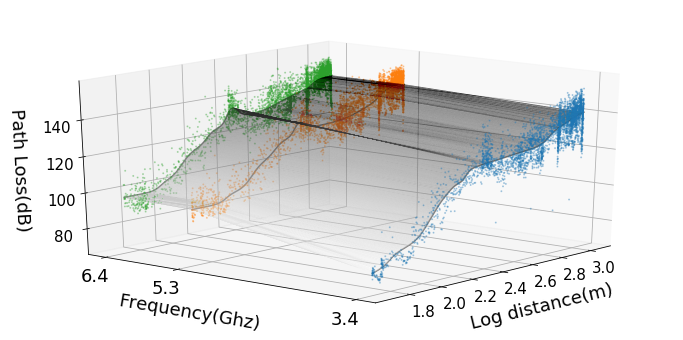

18.370159500330587
2001
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.62917,6.13836,6.66099
5.3Ghz,5.86883,6.08141,5.67953
6.4Ghz,5.68647,6.14060,6.06680
Overall,6.06138,6.11936,6.13303


In [51]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'logistic', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


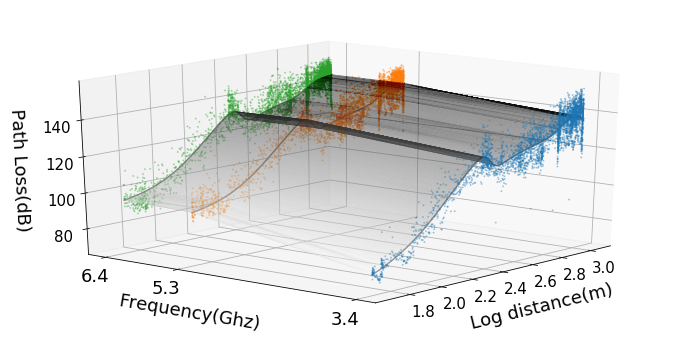

18.050978874997952
2001
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.49268,6.04855,6.59138
5.3Ghz,5.82750,6.06384,5.68661
6.4Ghz,5.71157,6.13679,6.16002
Overall,6.00849,6.08362,6.14278


In [52]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'tanh', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

In [26]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',26.16*np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',26.16*np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',26.16*np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',26.16*np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',26.16*np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',26.16*np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

print(X_train_bh)
print(np.power(10,X_train_bh))

[[ 1.69917874 92.38348847]
 [ 1.69921533 97.42705675]
 [ 1.6995259  99.56966812]
 ...
 [ 2.66794029 92.38348847]
 [ 2.66798139 92.38348847]
 [ 2.6680225  92.38348847]]
[[5.00240372e+01 2.41817914e+92]
 [5.00282520e+01 2.67335571e+97]
 [5.00640406e+01 3.71251417e+99]
 ...
 [4.65522081e+02 2.41817914e+92]
 [4.65566148e+02 2.41817914e+92]
 [4.65610216e+02 2.41817914e+92]]


In [27]:
%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

<Bundang>


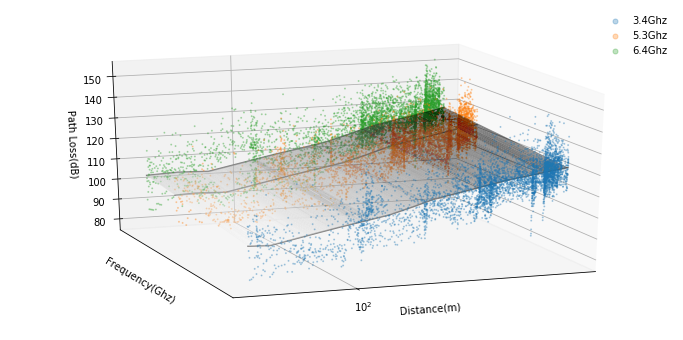

26.49147991478067
1002
7
1


RMSE(dB),train error,val error,test error
3.4Ghz,7.05177,6.96864,6.91479
5.3Ghz,7.12193,7.29951,7.21104
6.4Ghz,7.65931,7.59701,7.36490
Overall,7.27893,7.29155,7.16565


In [28]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (180, 180, 180, 180, 180,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Bundang>


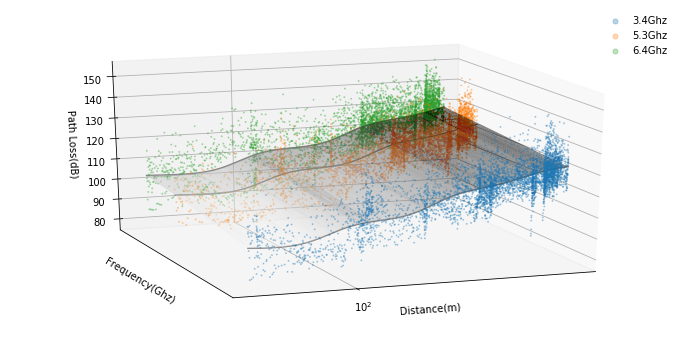

26.18725607018893
794
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,7.06810,7.10564,6.87410
5.3Ghz,7.05962,7.21954,7.12570
6.4Ghz,7.58251,7.48480,7.33878
Overall,7.23701,7.27010,7.11448


In [29]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'logistic', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Bundang>


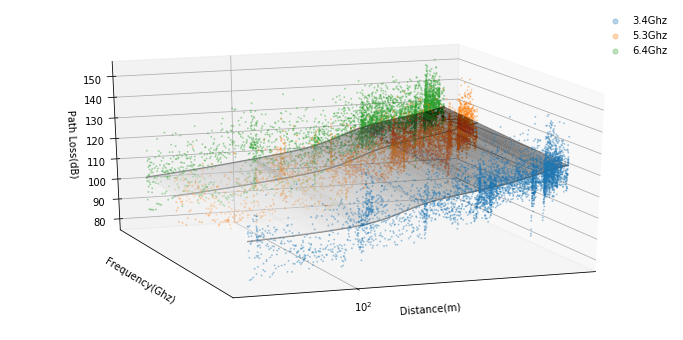

26.626741630514992
278
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,7.12840,7.08936,7.09152
5.3Ghz,7.16892,7.36940,7.25982
6.4Ghz,7.59512,7.52038,7.32811
Overall,7.29749,7.32816,7.22711


In [34]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'tanh', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


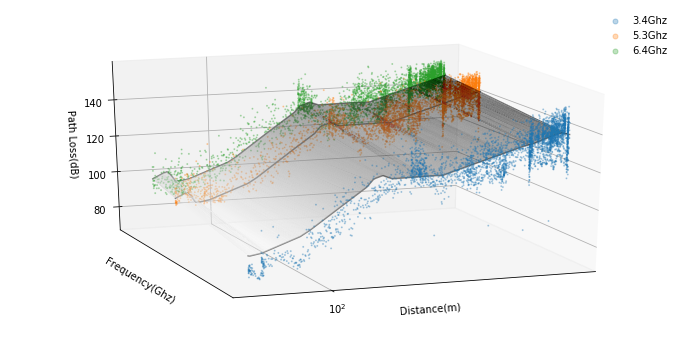

20.347059591647827
1001
7
1


RMSE(dB),train error,val error,test error
3.4Ghz,7.06926,7.07307,6.55503
5.3Ghz,6.11182,6.13515,6.08862
6.4Ghz,5.95109,6.45304,6.15657
Overall,6.37918,6.54991,6.26216


In [31]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (180, 180, 180, 180, 180,), 'relu', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


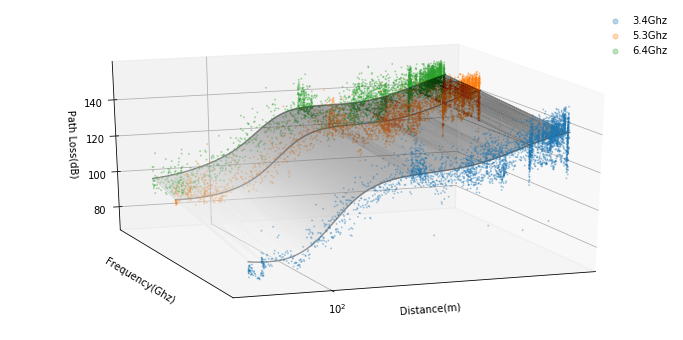

19.643959182660776
1001
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.70914,6.72502,6.17616
5.3Ghz,6.09137,6.15532,6.03121
6.4Ghz,6.01317,6.55004,6.16259
Overall,6.26798,6.47243,6.12154


In [32]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'logistic', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

<Mokdong>


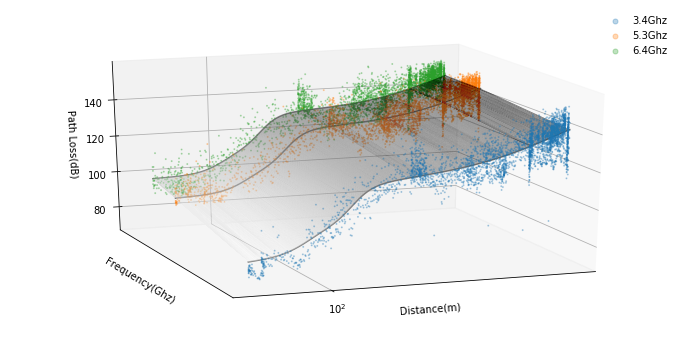

19.577443678512243
745
3
1


RMSE(dB),train error,val error,test error
3.4Ghz,6.79449,6.85356,6.28708
5.3Ghz,6.02816,6.10284,5.92761
6.4Ghz,5.95570,6.42940,6.13762
Overall,6.25736,6.45714,6.11360


In [33]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'tanh', 'lbfgs')

print("<Mokdong>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_val_ma_34, y_val_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_val_ma_53, y_val_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_val_ma_64, y_val_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_val_ma, y_val_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))